**Корректность проверена на Python 3.7:**
+ scipy 1.1.0
+ numpy 1.14.5

# Биномиальный критерий для доли

In [25]:
import numpy as np
from scipy import stats
import pandas as pd

In [3]:
import scipy
print(np.__version__)
print(scipy.__version__)

1.17.4
1.3.2


In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Shaken, not stirred

Джеймс Бонд говорит, что предпочитает мартини взболтанным, но не смешанным. Проведём слепой тест (blind test): $n$ раз предложим ему пару напитков и выясним, какой из двух он предпочитает. Получаем: 
* **выборка:** бинарный вектор длины $n$, где 1 — Джеймс Бонд предпочел взболтанный напиток, 0 — смешанный;
* **гипотеза $H_0$:** Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
* **статистика $T$:** количество единиц в выборке.

Если нулевая гипотеза справедлива и Джеймс Бонд действительно выбирает наугад, то мы можем с одинаковой вероятностью получить любой из $2^n$ бинарных векторов длины $n$. 

Мы могли бы перебрать все такие векторы, посчитать на каждом значение статистики $T$ и получить таким образом её нулевое распределение. Но в данном случае этот этап можно пропустить: мы имеем дело с выборкой, состоящей из 0 и 1, то есть, из распределения Бернулли $Ber(p)$. Нулевая гипотеза выбора наугад соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выбора взболтанного мартини равна $\frac1{2}$. Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$. Следовательно, нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$.

Пусть $n=16.$

In [14]:
n = 100
F_H0 = stats.binom(n, 0.75)

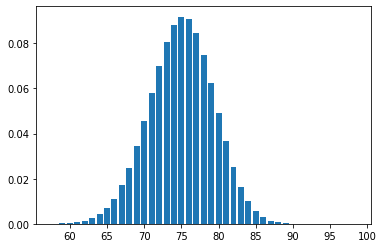

In [20]:
x = np.linspace(55,100,46)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(55.5, 100.5) 
pylab.show()

## Односторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает взболтанный мартини.

При такой альтернативе более вероятны большие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом хвосте распределения.

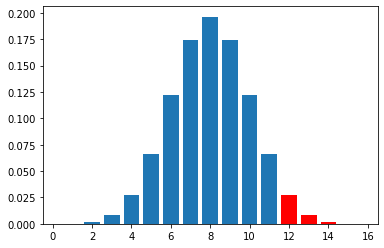

In [7]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [22]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

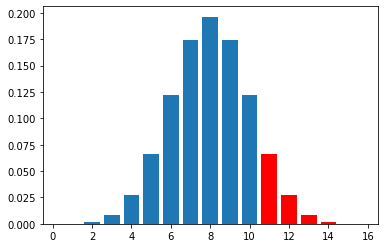

In [9]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(11,16,6), F_H0.pmf(np.linspace(11,16,6)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [10]:
stats.binom_test(11, 16, 0.5, alternative = 'greater')

0.10505676269531246

## Двусторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает какой-то определённый вид мартини.

При такой альтернативе более вероятны очень большие и очень маленькие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения.

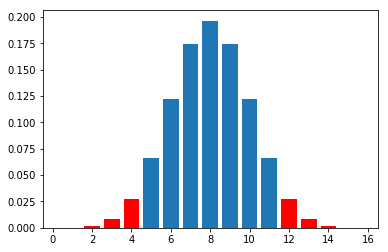

In [16]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(12,16,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
pylab.bar(np.linspace(0,4,5), F_H0.pmf(np.linspace(0,4,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [11]:
stats.binom_test(12, 16, 0.5, alternative = 'two-sided')

0.076812744140625

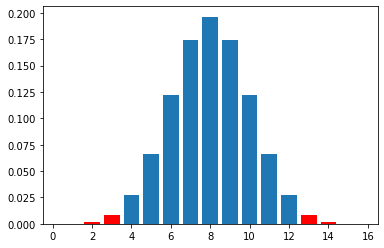

In [12]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(13,16,4), F_H0.pmf(np.linspace(13,16,4)), align = 'center', color='red')
pylab.bar(np.linspace(0,3,4), F_H0.pmf(np.linspace(0,3,4)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [13]:
stats.binom_test(13, 16, 0.5, alternative = 'two-sided')

0.021270751953125

In [32]:
df = pd.read_csv('pines.txt', sep = '\t')

In [59]:
x = stats.binned_statistic_2d(x = df['sn'], y = df['we'], values = None, statistic = 'count', bins = [bins, bins]).statistic

In [60]:
x

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [63]:
expected = sum(x)/25

In [77]:
hi2 = 0

for row in x:
    
    for element in row:
        
        hi2 += (element - expected)**2/expected

hi2

150.58904109589042

In [69]:
x.shape

(5, 5)

In [75]:
k = ([1, 2, 3], [4, 5, 6])
np.array(k)

array([[1, 2, 3],
       [4, 5, 6]])

In [76]:
for item in k:
    
    print(item)

[1, 2, 3]
[4, 5, 6]


In [78]:
y = np.full((5,5), expected)

In [81]:
stats.chisquare(np.ndarray.flatten(x), np.ndarray.flatten(y), ddof = 1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.87806178820889e-21)